In [1]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения
import re

# IMDB-база фильмов

Данная база данных содержит почти 190 000 фильмов длякоторых есть данные по их средним оценкам от зрителей и числу выставивших эти оценки (что отражает популярность), данные по оценкам от критиков (Metascore), бюджеты фильмов, их жанры, актерские составы, режиссеры, годы создания и даже краткие описания, а также показатель того, является ли указаный фильм сериалом. Подобный широкий набор признаков может подойти для различных задач, например регрессии, классификации или обработке нейронными сетями.

## 1. Загружаем данные

In [2]:
url = 'https://raw.githubusercontent.com/AntonK17/MachineLearning/master/imdb_database.csv'
data = pd.read_csv(url)

In [3]:
data = data.drop_duplicates(subset=['Movie Name'])

In [4]:
data.shape

(106536, 14)

In [5]:
type(data)
data

,Movie Name,Movie Date,Serie Name,Serie Date,Movie Type,Number of Votes,Movie Revenue (M$),Score,Metascore,Time Duration (min),Director,Actors,Restriction,Description
0,Les évadés,(1994),None,None,Drama,2294987,28341469,9.3,80,142,['Frank Darabont'],"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",Tous publics,Two imprisoned men bond over a number of years...
1,The Dark Knight: Le chevalier noir,(2008),None,None,"Action, Crime, Drama",2259829,534858444,9.0,84,152,['Christopher Nolan'],"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...",Tous publics,When the menace known as the Joker wreaks havo...
2,Inception,(2010),None,None,"Action, Adventure, Sci-Fi",2021865,292576195,8.8,74,148,['Christopher Nolan'],"['Leonardo DiCaprio', 'Joseph Gordon-Levitt', ...",Tous publics,A thief who steals corporate secrets through t...
3,Fight Club,(1999),None,None,Drama,1819635,37030102,8.8,66,139,['David Fincher'],"['Brad Pitt', 'Edward Norton', 'Meat Loaf', 'Z...",16,An insomniac office worker and a devil-may-car...
4,Pulp Fiction,(1994),None,None,"Crime, Drama",1792272,107928762,8.9,94,154,['Quentin Tarantino'],"['John Travolta', 'Uma Thurman', 'Samuel L. Ja...",12,"The lives of two mob hitmen, a boxer, a gangst..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189884,The Adventures of Tintin: The Secret of the Un...,(2011 Video Game),None,None,"Animation, Action, Adventure",152,None,7.0,None,None,['Jacques Exertier'],"['Ewan Bailey', 'James Barriscale', 'Mark Baze...",12,A reporter named Tintin must help Captain Hadd...
189888,Steve Coogan Live: As Alan Partridge and Other...,(2009 Video),None,None,"Documentary, Comedy",152,None,6.5,None,90,['Mick Thomas'],"['Steve Coogan', 'Alice Lowe', 'Flik Swan', 'S...",None,Steve Coogan takes to the stage in his first s...
189890,Out of the Wild: Venezuela,(2011– ),None,None,Reality-TV,152,None,7.9,None,None,[],[],None,"Armed With Only Basic Supplies, Nine Strangers..."
189894,Sadie J,(2011– ),None,None,Comedy,152,None,5.5,None,None,[],"['Georgia Lock', 'Mel Giedroyc', 'Bobby Fuller...",None,"Sadie, an exuberant British teenager, navigate..."


Мы видим, что столбцы (признаки) имеют имена

- `Movie Name` - Наименование фильма
- `Movie Date` - Дата выпуска. Формат (`Year`) для полнометражного и (`Year`-`Year`) для серийного
- `Serie Name` - Наименование конкретного эпизода/серии
- `Serie Date` - Год выхода эпизода/серии
- `Movie Type` - Жанр
- `Number of Votes` - количество поставленных оценок (оценки от 1 до 10)
- `Movie Revenue` - Доход фильма/эпизода
- `Score` - Средняя оценка зрителей
- `Metascore` - Средняя оценка критиков (от 0 до 100)
- `Time Duration` - Продолжительность фильма/эпизода
- `Director` - Имя и фамилия режиссера
- `Actors` - Каст фильма
- `Restriction` - Возрастной рейтинг (PG, 12, 16 и тд)
- `Description` - Краткое описание


In [6]:
data.columns

Index(['Movie Name', 'Movie Date', 'Serie Name', 'Serie Date', 'Movie Type',
       'Number of Votes', 'Movie Revenue (M$)', 'Score', 'Metascore',
       'Time Duration (min)', 'Director', 'Actors', 'Restriction',
       'Description'],
      dtype='object')

'Movie Date', 'Serie Date', 'Number of Votes', 'Movie Revenue (M$)', 'Score', 'Metascore', 'Time Duration (min)' - Количественные характеристики. Остальные - номинальные

In [7]:
data['Movie Type'].dtype

dtype('O')

### Задаем категории, упрощаем информацию по жанрам

In [8]:
for index, value in data['Movie Type'].items():    
    data.at[index, 'Movie Type'] = value.split(',')[0]
data['Movie Type'] = data['Movie Type'].astype('category')
data['Director'] = data['Director'].astype('category')
data['Restriction'] = data['Restriction'].astype('category')
data['Restriction'].dtype

CategoricalDtype(categories=['(Banned)', '0+', '10', '12', '12 avec avertissement', '13',
                  '14+', '16', '18', '6+', '7', '9+', 'Approved', 'G', 'GP',
                  'M', 'M/PG', 'NC-17', 'None', 'Not Rated', 'PG', 'PG-13',
                  'R', 'T', 'TV-PG', 'Tous Public', 'Tous publics',
                  'Tous publics (2019)', 'Tous publics avec avertissement',
                  'Tout public', 'Unrated', 'X'],
                 ordered=False)

In [9]:
data.loc[:,['Movie Type']]

,Movie Type
0,Drama
1,Action
2,Action
3,Drama
4,Crime
...,...
189884,Animation
189888,Documentary
189890,Reality-TV
189894,Comedy


In [10]:
data['Director'].dtype

CategoricalDtype(categories=['["'Evil' Ted Smith"]', '["'Philthy' Phil Phillips"]',
                  '["'Weird Al' Yankovic"]', '["Adam O'Brien"]',
                  '["Adrian O'Connell"]', '["Ahmad Reza Mo'tamedi"]',
                  '["Alessandro D'Alatri"]', '["Alice O'Fredericks"]',
                  '["Alma Har'el"]', '["Andrew O'Connor"]',
                  ...
                  '['Ümit Degirmenci']', '['Ümit Efekan']', '['Ümit Kivanç']',
                  '['Ümit Köreken']', '['Ümit Ünal']', '['Ünal Küpeli']',
                  '['Þorsteinn Gunnar Bjarnason']', '['Þráinn Bertelsson']',
                  '['Þórhildur Þorleifsdóttir']', '[]'],
                 ordered=False)

In [11]:
data['Movie Type'].dtype

CategoricalDtype(categories=['Action', 'Adult', 'Adventure', 'Animation', 'Biography',
                  'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
                  'Fantasy', 'Film-Noir', 'Game-Show', 'History', 'Horror',
                  'Music', 'Musical', 'Mystery', 'News', 'None', 'Reality-TV',
                  'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show',
                  'Thriller', 'War', 'Western'],
                 ordered=False)

### Исправляем хаотичный формат года выпуска

In [12]:
print (data['Movie Date'].unique())

['(1994)' '(2008)' '(2010)' ... '(I) (1997 Video Game)' '(1956–1990)'
 '(1979–2016)']


In [13]:
data['Movie Date'] = data['Movie Date'].astype(str)
for index, value in data['Movie Date'].items():
    data.at[index, 'Movie Date'] = ''.join(filter(str.isnumeric, value))

In [14]:
for index, value in data['Movie Date'].items():    
    data.at[index, 'Movie Date'] = value[0:4]      
data.loc[:,['Movie Date']]

,Movie Date
0,1994
1,2008
2,2010
3,1999
4,1994
...,...
189884,2011
189888,2009
189890,2011
189894,2011


In [15]:
data['Director'] = data['Director'].astype(str)
for index, value in data['Director'].items():
    data.at[index, 'Director'] = ''.join(filter((str.isalpha or str.isspace), value))
data['Director'] = data['Director'].astype('category')

### Убираем ненужные значения 'None' в количественных признаках

In [16]:
data['Score'] = data.Score.apply(lambda x: np.nan if x == 'None' else x)
data['Metascore'] = data.Metascore.apply(lambda x: np.nan if x == 'None' else x)
data['Time Duration (min)']  = data['Time Duration (min)'].apply(lambda x: np.nan if x == 'None' else x)
data['Number of Votes'] = data['Number of Votes'].apply(lambda x: np.nan if x == 'None' else x)
data['Movie Revenue (M$)'] = data['Movie Revenue (M$)'].apply(lambda x: np.nan if x == 'None' else x)
data['Movie Date'] = data['Movie Date'].apply(lambda x: np.nan if x == '' else x)

In [17]:
data['Score'] = data['Score'].astype('float64')
data['Metascore'] = data['Metascore'].astype('float64')
data['Time Duration (min)'] = data['Time Duration (min)'].astype('float64')
data['Number of Votes'] = data['Number of Votes'].astype('float64')
data['Movie Revenue (M$)'] = data['Movie Revenue (M$)'].astype('float64')
data['Movie Date'] = data['Movie Date'].astype('float64')
data['Movie Date'].dtype


dtype('float64')

In [18]:
data

,Movie Name,Movie Date,Serie Name,Serie Date,Movie Type,Number of Votes,Movie Revenue (M$),Score,Metascore,Time Duration (min),Director,Actors,Restriction,Description
0,Les évadés,1994.0,None,None,Drama,2294987.0,28341469.0,9.3,80.0,142.0,FrankDarabont,"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",Tous publics,Two imprisoned men bond over a number of years...
1,The Dark Knight: Le chevalier noir,2008.0,None,None,Action,2259829.0,534858444.0,9.0,84.0,152.0,ChristopherNolan,"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...",Tous publics,When the menace known as the Joker wreaks havo...
2,Inception,2010.0,None,None,Action,2021865.0,292576195.0,8.8,74.0,148.0,ChristopherNolan,"['Leonardo DiCaprio', 'Joseph Gordon-Levitt', ...",Tous publics,A thief who steals corporate secrets through t...
3,Fight Club,1999.0,None,None,Drama,1819635.0,37030102.0,8.8,66.0,139.0,DavidFincher,"['Brad Pitt', 'Edward Norton', 'Meat Loaf', 'Z...",16,An insomniac office worker and a devil-may-car...
4,Pulp Fiction,1994.0,None,None,Crime,1792272.0,107928762.0,8.9,94.0,154.0,QuentinTarantino,"['John Travolta', 'Uma Thurman', 'Samuel L. Ja...",12,"The lives of two mob hitmen, a boxer, a gangst..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189884,The Adventures of Tintin: The Secret of the Un...,2011.0,None,None,Animation,152.0,NaN,7.0,NaN,NaN,JacquesExertier,"['Ewan Bailey', 'James Barriscale', 'Mark Baze...",12,A reporter named Tintin must help Captain Hadd...
189888,Steve Coogan Live: As Alan Partridge and Other...,2009.0,None,None,Documentary,152.0,NaN,6.5,NaN,90.0,MickThomas,"['Steve Coogan', 'Alice Lowe', 'Flik Swan', 'S...",None,Steve Coogan takes to the stage in his first s...
189890,Out of the Wild: Venezuela,2011.0,None,None,Reality-TV,152.0,NaN,7.9,NaN,NaN,,[],None,"Armed With Only Basic Supplies, Nine Strangers..."
189894,Sadie J,2011.0,None,None,Comedy,152.0,NaN,5.5,NaN,NaN,,"['Georgia Lock', 'Mel Giedroyc', 'Bobby Fuller...",None,"Sadie, an exuberant British teenager, navigate..."


## 2.Проверка пропущенных значений


In [19]:
data.isna().sum()

Movie Name                 0
Movie Date                 4
Serie Name                 1
Serie Date                 1
Movie Type                 0
Number of Votes            0
Movie Revenue (M$)     97805
Score                      0
Metascore              98176
Time Duration (min)     7242
Director                   0
Actors                     0
Restriction                0
Description                0
dtype: int64

In [20]:
data['Time Duration (min)'].mean()

86.68206538159406

In [21]:
data['Time Duration (min)'].median()

90.0

In [22]:
data['Time Duration (min)'].fillna(data['Time Duration (min)'].mean(), inplace=True)

In [23]:
data.isna().sum()

Movie Name                 0
Movie Date                 4
Serie Name                 1
Serie Date                 1
Movie Type                 0
Number of Votes            0
Movie Revenue (M$)     97805
Score                      0
Metascore              98176
Time Duration (min)        0
Director                   0
Actors                     0
Restriction                0
Description                0
dtype: int64

In [24]:
data['Movie Date'].fillna(data['Movie Date'].mode().iloc[0], inplace=True)
data['Serie Date'].fillna(data['Serie Date'].mode().iloc[0], inplace=True)
data['Serie Name'].fillna(data['Serie Name'].mode().iloc[0], inplace=True)
data.isna().sum()

Movie Name                 0
Movie Date                 0
Serie Name                 0
Serie Date                 0
Movie Type                 0
Number of Votes            0
Movie Revenue (M$)     97805
Score                      0
Metascore              98176
Time Duration (min)        0
Director                   0
Actors                     0
Restriction                0
Description                0
dtype: int64

In [25]:
print (data['Movie Date'].unique())

[1994. 2008. 2010. 1999. 2011. 2001. 2003. 1972. 2012. 2014. 2002. 1995.
 2000. 2005. 1991. 2009. 1998. 1977. 1993. 2006. 2013. 1980. 1974. 1985.
 1997. 1990. 1983. 2017. 1986. 2019. 1989. 1927. 1971. 1956. 1973. 1988.
 1966. 2020. 1946. 2007. 2016. 2004. 1955. 2015. 2018. 1984. 1978. 1948.
 1996. 1992. 1979. 1976. 1975. 1982. 1933. 1949. 1964. 1922. 1945. 1987.
 1942. 1967. 1970. 1941. 1965. 1963. 1960. 1936. 1943. 1952. 1958. 1921.
 1939. 1981. 1953. 1950. 1928. 1969. 1923. 1957. 1944. 1954. 1929. 1938.
 1932. 1947. 1951. 1968. 1961. 1959. 1919. 1934. 1940. 1925. 1962. 1924.
 1937. 1917. 1918. 1920. 1930. 1935. 1931. 1926. 1915. 1910. 1914. 1916.
 1904. 1901. 1912. 1903. 1909. 1908. 1913. 1905. 1906. 1911. 1907. 1900.
 1902.]


In [26]:
print (data['Metascore'].unique())

[ 80.  84.  74.  66.  94.  82.  nan  73.  92. 100.  78.  87.  65.  81.
  67.  70.  69.  85.  91.  90.  75.  61.  83.  63.  76.  62.  64.  95.
  77.  68.  58.   9.  37.  30.  41.  49.  54.  33.  38.  34.  55.  19.
  40.  39.  57.  32.  44.  45.  89.  72.  25.  46.  71.  53.  35.  51.
  48.  17.  60.  56.  26.  42.  24.   8.  50.  43.  27.  29.  36.  16.
  59.  52.  86.  28.  14.  21.  93.  47.  31.  15.  23.  18.  22.  20.
  79.  88.  13.  99.   7.  11.   1.   4.   2.  12.  10.  97.  98.  96.
   5.   6.   3.]


In [27]:
data['Movie Date'] = data['Movie Date'].astype(int)
data['Number of Votes'] = data['Number of Votes'].astype(int)
data['Movie Date'].dtype

dtype('int32')

In [28]:
data

,Movie Name,Movie Date,Serie Name,Serie Date,Movie Type,Number of Votes,Movie Revenue (M$),Score,Metascore,Time Duration (min),Director,Actors,Restriction,Description
0,Les évadés,1994,None,None,Drama,2294987,28341469.0,9.3,80.0,142.000000,FrankDarabont,"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",Tous publics,Two imprisoned men bond over a number of years...
1,The Dark Knight: Le chevalier noir,2008,None,None,Action,2259829,534858444.0,9.0,84.0,152.000000,ChristopherNolan,"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...",Tous publics,When the menace known as the Joker wreaks havo...
2,Inception,2010,None,None,Action,2021865,292576195.0,8.8,74.0,148.000000,ChristopherNolan,"['Leonardo DiCaprio', 'Joseph Gordon-Levitt', ...",Tous publics,A thief who steals corporate secrets through t...
3,Fight Club,1999,None,None,Drama,1819635,37030102.0,8.8,66.0,139.000000,DavidFincher,"['Brad Pitt', 'Edward Norton', 'Meat Loaf', 'Z...",16,An insomniac office worker and a devil-may-car...
4,Pulp Fiction,1994,None,None,Crime,1792272,107928762.0,8.9,94.0,154.000000,QuentinTarantino,"['John Travolta', 'Uma Thurman', 'Samuel L. Ja...",12,"The lives of two mob hitmen, a boxer, a gangst..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189884,The Adventures of Tintin: The Secret of the Un...,2011,None,None,Animation,152,NaN,7.0,NaN,86.682065,JacquesExertier,"['Ewan Bailey', 'James Barriscale', 'Mark Baze...",12,A reporter named Tintin must help Captain Hadd...
189888,Steve Coogan Live: As Alan Partridge and Other...,2009,None,None,Documentary,152,NaN,6.5,NaN,90.000000,MickThomas,"['Steve Coogan', 'Alice Lowe', 'Flik Swan', 'S...",None,Steve Coogan takes to the stage in his first s...
189890,Out of the Wild: Venezuela,2011,None,None,Reality-TV,152,NaN,7.9,NaN,86.682065,,[],None,"Armed With Only Basic Supplies, Nine Strangers..."
189894,Sadie J,2011,None,None,Comedy,152,NaN,5.5,NaN,86.682065,,"['Georgia Lock', 'Mel Giedroyc', 'Bobby Fuller...",None,"Sadie, an exuberant British teenager, navigate..."


### Датасет полнометражных фильмов

In [29]:
films=pd.DataFrame(data)
indexes=films[ films['Serie Date'] != 'None' ].index
films.drop(indexes, inplace=True)
films.describe(include='all')

,Movie Name,Movie Date,Serie Name,Serie Date,Movie Type,Number of Votes,Movie Revenue (M$),Score,Metascore,Time Duration (min),Director,Actors,Restriction,Description
count,103838,103838.000000,103838,103838,103838,1.038380e+05,8.726000e+03,103838.000000,8357.000000,103838.000000,103838,103838,103838,103838
unique,103838,NaN,2,1,29,NaN,NaN,NaN,NaN,NaN,37976,99230,30,101189
top,Erde,NaN,None,None,Comedy,NaN,NaN,NaN,NaN,NaN,,[],None,Add a Plot
freq,1,NaN,103837,103838,24720,NaN,NaN,NaN,NaN,NaN,16147,2088,82771,2515
mean,NaN,1996.184383,NaN,NaN,NaN,1.871011e+03,4.170297e+06,6.234965,57.755415,87.577827,NaN,NaN,NaN,NaN
std,NaN,23.385580,NaN,NaN,NaN,2.938946e+04,2.148023e+07,1.351831,17.076392,51.916398,NaN,NaN,NaN,NaN
min,NaN,1900.000000,NaN,NaN,NaN,1.520000e+02,1.000000e+00,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN
25%,NaN,1986.000000,NaN,NaN,NaN,2.540000e+02,4.681750e+04,5.500000,46.000000,78.000000,NaN,NaN,NaN,NaN
50%,NaN,2005.000000,NaN,NaN,NaN,4.880000e+02,2.773600e+05,6.400000,60.000000,90.000000,NaN,NaN,NaN,NaN
75%,NaN,2013.000000,NaN,NaN,NaN,1.281000e+03,2.000000e+06,7.200000,71.000000,102.000000,NaN,NaN,NaN,NaN


In [30]:
films.isna().sum()

Movie Name                 0
Movie Date                 0
Serie Name                 0
Serie Date                 0
Movie Type                 0
Number of Votes            0
Movie Revenue (M$)     95112
Score                      0
Metascore              95481
Time Duration (min)        0
Director                   0
Actors                     0
Restriction                0
Description                0
dtype: int64

## 3.Более подробное ознакомление с данными

In [31]:
data.corr()

,Movie Date,Number of Votes,Movie Revenue (M$),Score,Metascore,Time Duration (min)
Movie Date,1.000000,0.005501,-0.055223,-0.066328,-0.024327,0.082412
Number of Votes,0.005501,1.000000,0.720108,0.042620,0.087424,0.028003
Movie Revenue (M$),-0.055223,0.720108,1.000000,0.081512,0.042091,0.113837
Score,-0.066328,0.042620,0.081512,1.000000,0.678056,-0.046396
Metascore,-0.024327,0.087424,0.042091,0.678056,1.000000,0.103352
Time Duration (min),0.082412,0.028003,0.113837,-0.046396,0.103352,1.000000


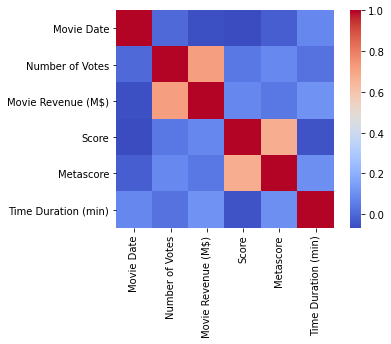

In [32]:
corr_mat=data.corr()
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

In [33]:
films.corr()

,Movie Date,Number of Votes,Movie Revenue (M$),Score,Metascore,Time Duration (min)
Movie Date,1.000000,0.005930,-0.055241,-0.082824,-0.024098,0.093823
Number of Votes,0.005930,1.000000,0.720107,0.044288,0.087458,0.027684
Movie Revenue (M$),-0.055241,0.720107,1.000000,0.081572,0.042135,0.113805
Score,-0.082824,0.044288,0.081572,1.000000,0.677979,-0.027932
Metascore,-0.024098,0.087458,0.042135,0.677979,1.000000,0.103331
Time Duration (min),0.093823,0.027684,0.113805,-0.027932,0.103331,1.000000


In [34]:
data.describe(include=['category'])

,Movie Type,Director,Restriction
count,106536,106536,106536
unique,29,38702,32
top,Comedy,,None
freq,25388,16259,84315


### Матрицы разброса:

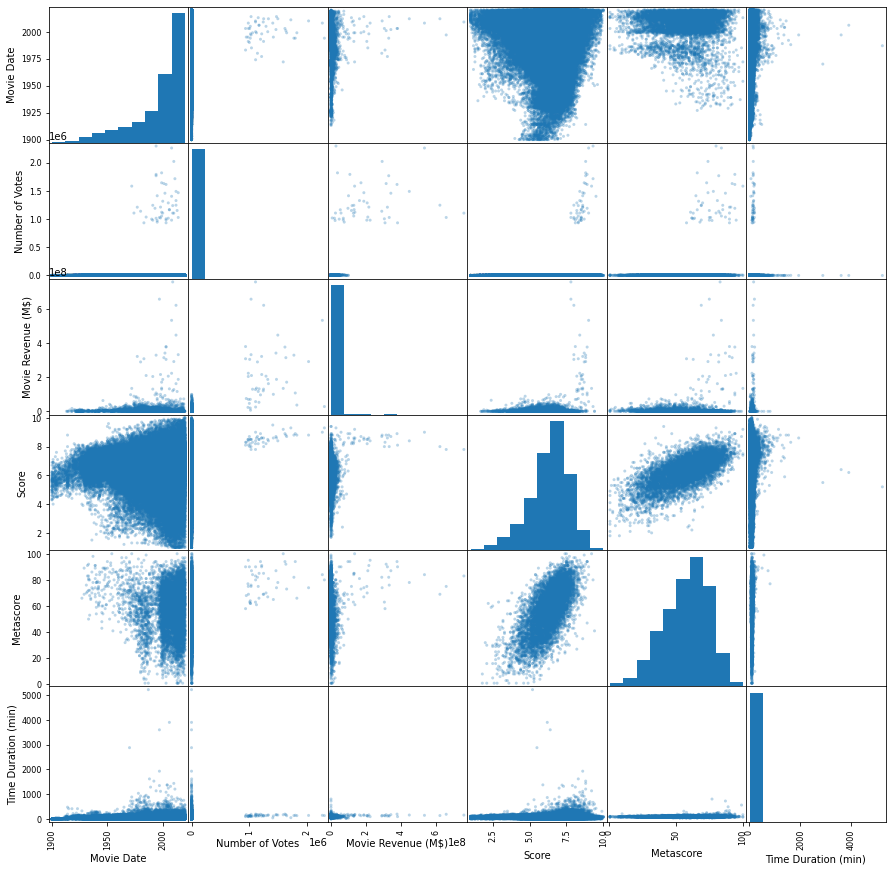

In [35]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .3, figsize = (15, 15))
pass

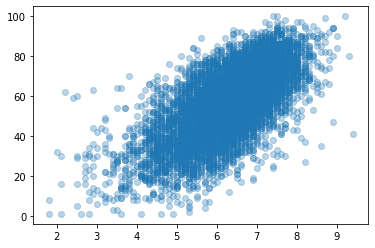

In [36]:
plt.scatter(data['Score'], data['Metascore'],alpha=0.3)
pass

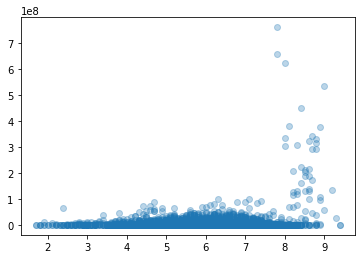

In [37]:
plt.scatter(data['Score'], data['Movie Revenue (M$)'], alpha=0.3)
pass

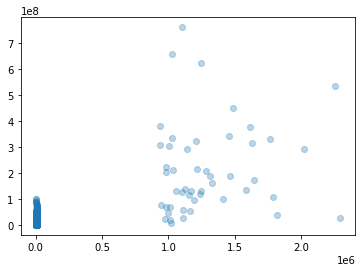

In [38]:
plt.scatter(data['Number of Votes'], data['Movie Revenue (M$)'], alpha=0.3)
pass

In [39]:
data.loc[data['Movie Revenue (M$)'] > 300000000.0]

,Movie Name,Movie Date,Serie Name,Serie Date,Movie Type,Number of Votes,Movie Revenue (M$),Score,Metascore,Time Duration (min),Director,Actors,Restriction,Description
1,The Dark Knight: Le chevalier noir,2008,None,None,Action,2259829,534858444.0,9.0,84.0,152.0,ChristopherNolan,"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...",Tous publics,When the menace known as the Joker wreaks havo...
5,Forrest Gump,1994,None,None,Drama,1768611,330252182.0,8.8,82.0,142.0,RobertZemeckis,"['Tom Hanks', 'Robin Wright', 'Gary Sinise', '...",Tous publics,"The presidencies of Kennedy and Johnson, the e..."
8,Le Seigneur des anneaux : La Communauté de l'a...,2001,None,None,Action,1629593,315544750.0,8.8,92.0,178.0,PeterJackson,"['Elijah Wood', 'Ian McKellen', 'Orlando Bloom...",Tous publics,A meek Hobbit from the Shire and eight compani...
9,Le Seigneur des anneaux : Le Retour du roi,2003,None,None,Action,1613857,377845905.0,8.9,94.0,201.0,PeterJackson,"['Elijah Wood', 'Viggo Mortensen', 'Ian McKell...",Tous publics,Gandalf and Aragorn lead the World of Men agai...
11,The Dark Knight Rises,2012,None,None,Action,1490783,448139099.0,8.4,78.0,164.0,ChristopherNolan,"['Christian Bale', 'Tom Hardy', 'Anne Hathaway...",Tous publics,Eight years after the Joker's reign of anarchy...
13,Le Seigneur des anneaux : Les Deux Tours,2002,None,None,Action,1458632,342551365.0,8.7,87.0,179.0,PeterJackson,"['Elijah Wood', 'Ian McKellen', 'Viggo Mortens...",Tous publics,While Frodo and Sam edge closer to Mordor with...
19,Avengers,2012,None,None,Action,1246240,623279547.0,8.0,69.0,143.0,JossWhedon,"['Robert Downey Jr.', 'Chris Evans', 'Scarlett...",Tous publics,Earth's mightiest heroes must come together an...
23,La guerre des étoiles,1977,None,None,Action,1210685,322740140.0,8.6,90.0,121.0,GeorgeLucas,"['Mark Hamill', 'Harrison Ford', 'Carrie Fishe...",Tous publics,Luke Skywalker joins forces with a Jedi Knight...
32,Avatar,2009,None,None,Action,1105645,760507625.0,7.8,83.0,162.0,JamesCameron,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",Tous publics,A paraplegic Marine dispatched to the moon Pan...
36,Les gardiens de la galaxie,2014,None,None,Action,1028593,333176600.0,8.0,76.0,121.0,JamesGunn,"['Chris Pratt', 'Vin Diesel', 'Bradley Cooper'...",Tous publics,A group of intergalactic criminals must pull t...


### Рассмотрим фильмы для которых известны доход и оценка критиков

In [40]:
data_new=data[data['Movie Revenue (M$)'] > 0.0]
data_new=data_new[data_new['Metascore'] > 0.0 ]
data_new.shape

(4723, 14)

In [41]:
data_new.isna().sum()

Movie Name             0
Movie Date             0
Serie Name             0
Serie Date             0
Movie Type             0
Number of Votes        0
Movie Revenue (M$)     0
Score                  0
Metascore              0
Time Duration (min)    0
Director               0
Actors                 0
Restriction            0
Description            0
dtype: int64

In [42]:
data_new.describe(include=['category'])

,Movie Type,Director,Restriction
count,4723,4723,4723
unique,20,3506,17
top,Drama,TylerPerry,None
freq,1392,17,1563


In [43]:
data_new.describe()

,Movie Date,Number of Votes,Movie Revenue (M$),Score,Metascore,Time Duration (min)
count,4723.000000,4.723000e+03,4.723000e+03,4723.000000,4723.000000,4723.000000
mean,2004.846496,1.678930e+04,5.060165e+06,6.439763,58.533983,101.262545
std,11.758257,1.328966e+05,2.848070e+07,0.910033,16.773028,23.582438
min,1927.000000,1.540000e+02,1.380000e+02,1.800000,1.000000,38.000000
25%,2000.000000,1.076000e+03,2.989850e+04,5.900000,48.000000,90.000000
50%,2007.000000,2.938000e+03,1.500710e+05,6.500000,61.000000,98.000000
75%,2013.000000,6.108000e+03,1.213455e+06,7.100000,71.000000,108.000000
max,2020.000000,2.294987e+06,7.605076e+08,9.400000,100.000000,808.000000


In [44]:
data_new.corr()

,Movie Date,Number of Votes,Movie Revenue (M$),Score,Metascore,Time Duration (min)
Movie Date,1.000000,-0.051373,-0.115787,0.018699,0.095792,-0.077223
Number of Votes,-0.051373,1.000000,0.735993,0.227366,0.114717,0.196715
Movie Revenue (M$),-0.115787,0.735993,1.000000,0.111479,0.042091,0.161100
Score,0.018699,0.227366,0.111479,1.000000,0.692038,0.148894
Metascore,0.095792,0.114717,0.042091,0.692038,1.000000,0.105649
Time Duration (min),-0.077223,0.196715,0.161100,0.148894,0.105649,1.000000


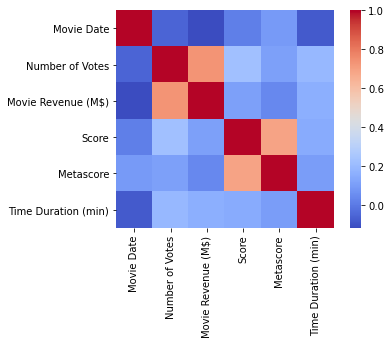

In [45]:
corr_mat=data_new.corr()
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

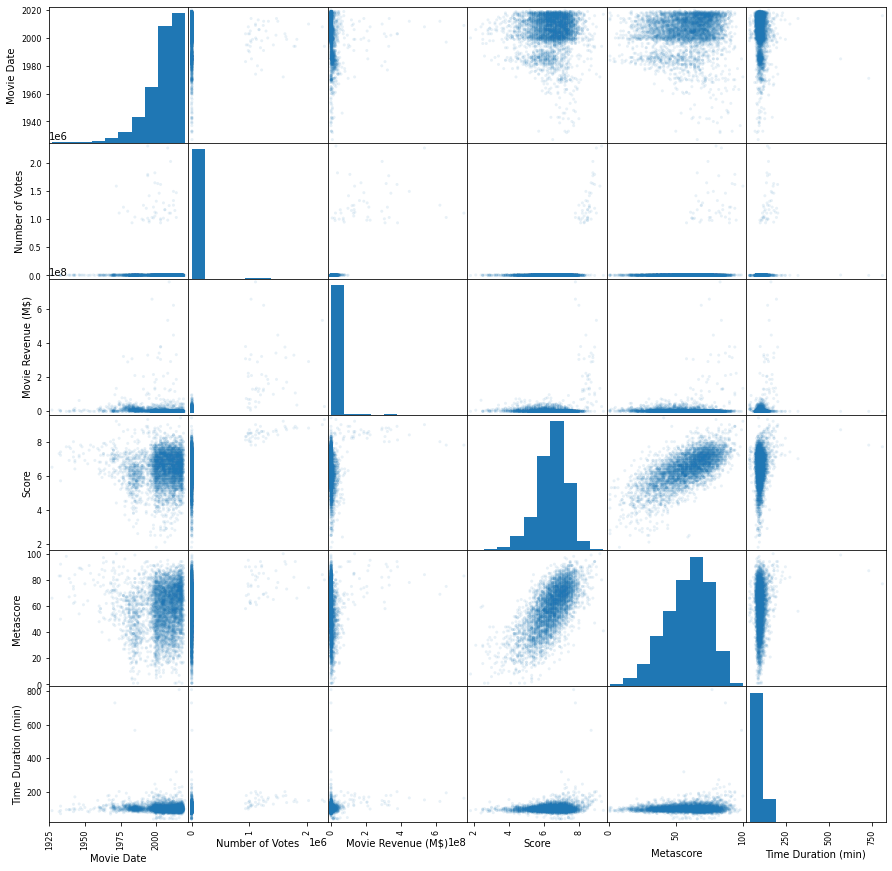

In [46]:
from pandas.plotting import scatter_matrix
scatter_matrix(data_new, alpha = .1, figsize = (15, 15))
pass

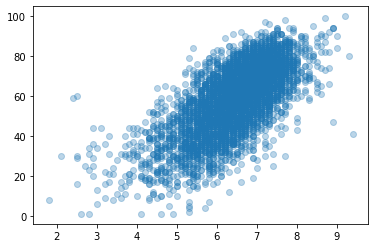

In [47]:
plt.scatter(data_new['Score'], data_new['Metascore'],alpha=0.3)
pass

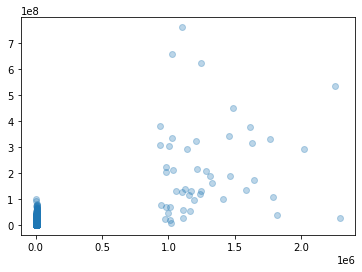

In [48]:
plt.scatter(data_new['Number of Votes'], data_new['Movie Revenue (M$)'],alpha=0.3)
pass

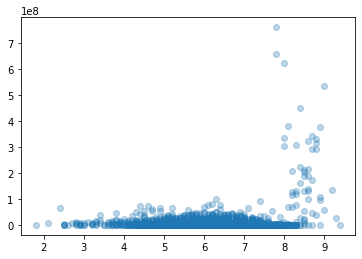

In [49]:
plt.scatter(data_new['Score'], data_new['Movie Revenue (M$)'], alpha=0.3)
pass

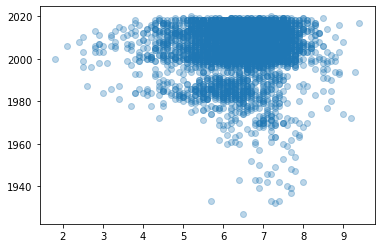

In [50]:
plt.scatter(data_new['Score'], data_new['Movie Date'], alpha=0.3)
pass

### Убираем выбросы для Матрицы разброса (доход и число проголосовавших)

In [51]:
data_new['Number of Votes'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005        164.61
0.010        177.00
0.050        286.10
0.100        462.40
0.500       2938.00
0.900       9011.80
0.950      10092.00
0.990     730565.10
0.995    1165919.03
Name: Number of Votes, dtype: float64

In [52]:
data_new['Movie Revenue (M$)'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    9.774700e+02
0.010    1.430880e+03
0.050    4.603200e+03
0.100    8.876000e+03
0.500    1.500710e+05
0.900    1.034808e+07
0.950    2.037515e+07
0.990    6.557152e+07
0.995    1.661885e+08
Name: Movie Revenue (M$), dtype: float64

In [53]:
rows_to_drop = data_new[(data_new['Number of Votes'] > data_new['Number of Votes'].quantile(0.95)) | 
    (data_new['Movie Revenue (M$)']  > data_new['Movie Revenue (M$)'].quantile(0.95))].index
data_with_drops = data_new.drop(rows_to_drop)
data_with_drops.shape

(4323, 14)

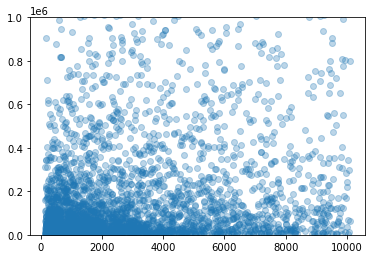

In [54]:
plt.scatter(data_with_drops['Number of Votes'], data_with_drops['Movie Revenue (M$)'],alpha=0.3)
plt.ylim(0, 1000000)
pass

### Датасет без выброса самых кассовых фильмов

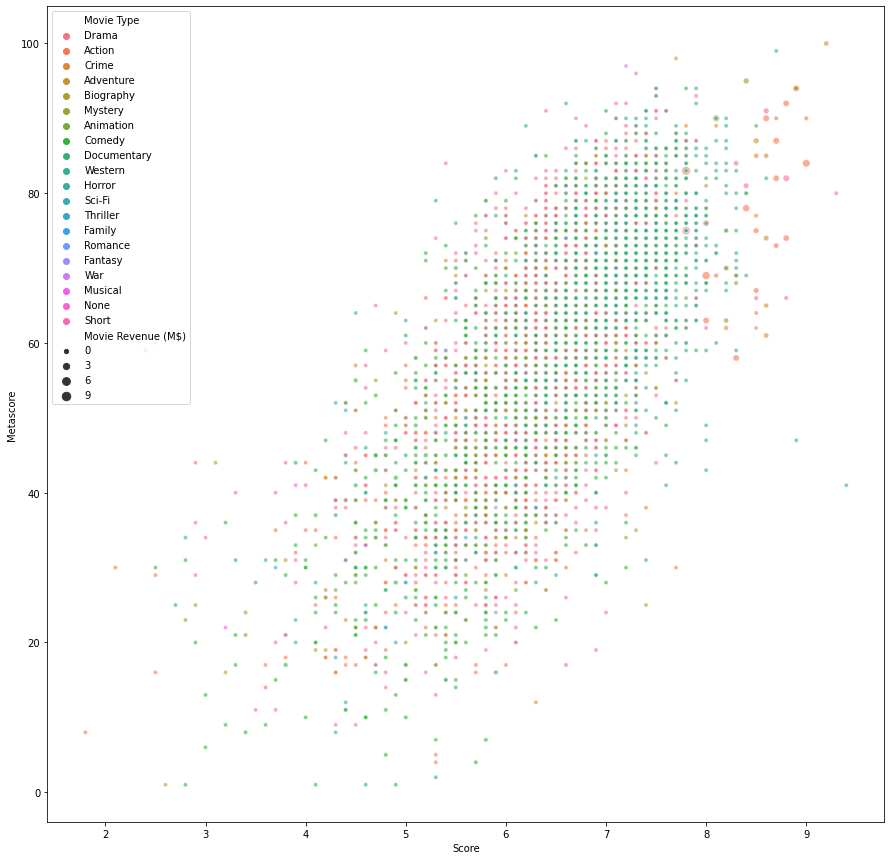

In [55]:
plt.figure(figsize = (15, 15))
sns.scatterplot(x='Score', y='Metascore', size='Movie Revenue (M$)', hue='Movie Type', data=data_new, alpha=0.6)
pass

### Датасет с выбросом самых кассовых фильмов

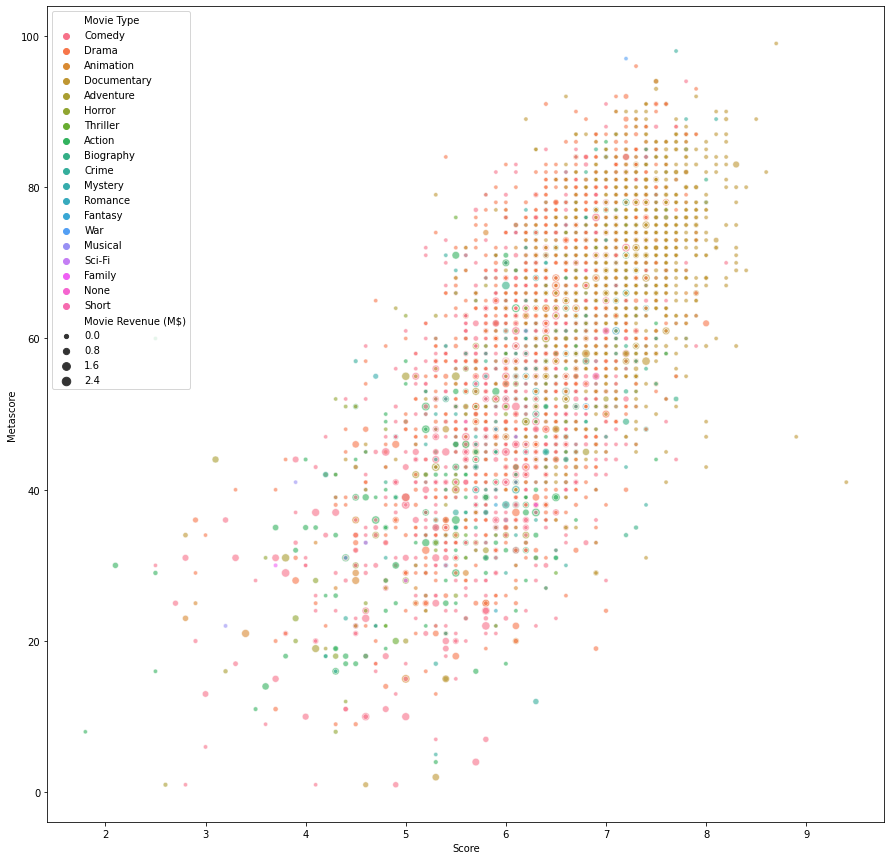

In [56]:
plt.figure(figsize = (15, 15))
sns.scatterplot(x='Score', y='Metascore', size='Movie Revenue (M$)', hue='Movie Type', data=data_with_drops, alpha=0.6)
pass

### Число фильмов по жанрам во всей базе данных

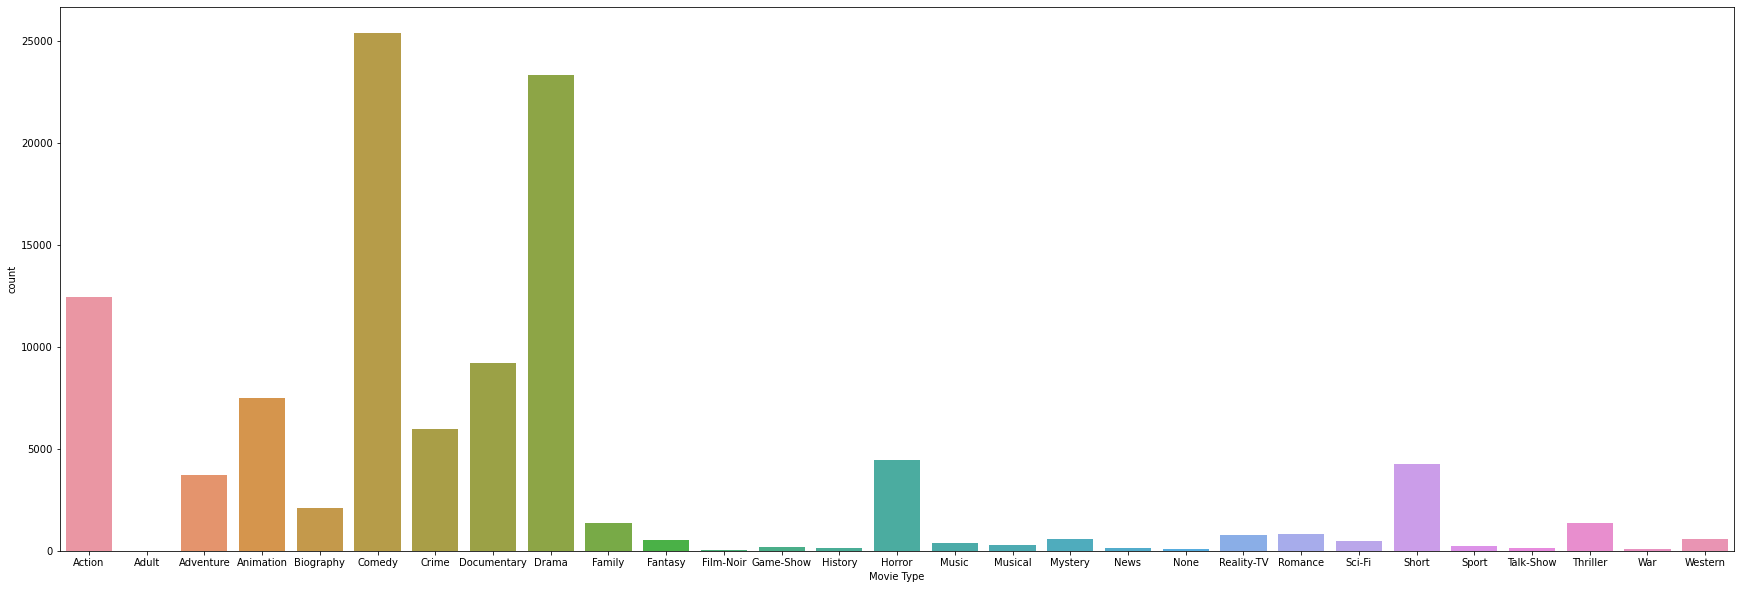

In [57]:
plt.figure(figsize=(30,10))
sns.countplot(x='Movie Type', data=data)
pass

In [58]:
popular_genres = data.loc[data['Movie Type'].isin(['Action','Drama','Adventure','Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Short', 'Thriller','Horror'])]
copy_pg=popular_genres.copy()
copy_pg['Movie Type'] = copy_pg['Movie Type'].astype('O')
copy_pg['Movie Type'] = copy_pg['Movie Type'].astype('category')
copy_pg['Movie Type'].dtype


CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
                  'Crime', 'Documentary', 'Drama', 'Horror', 'Short',
                  'Thriller'],
                 ordered=False)

### Оценка в зависимости от жанра

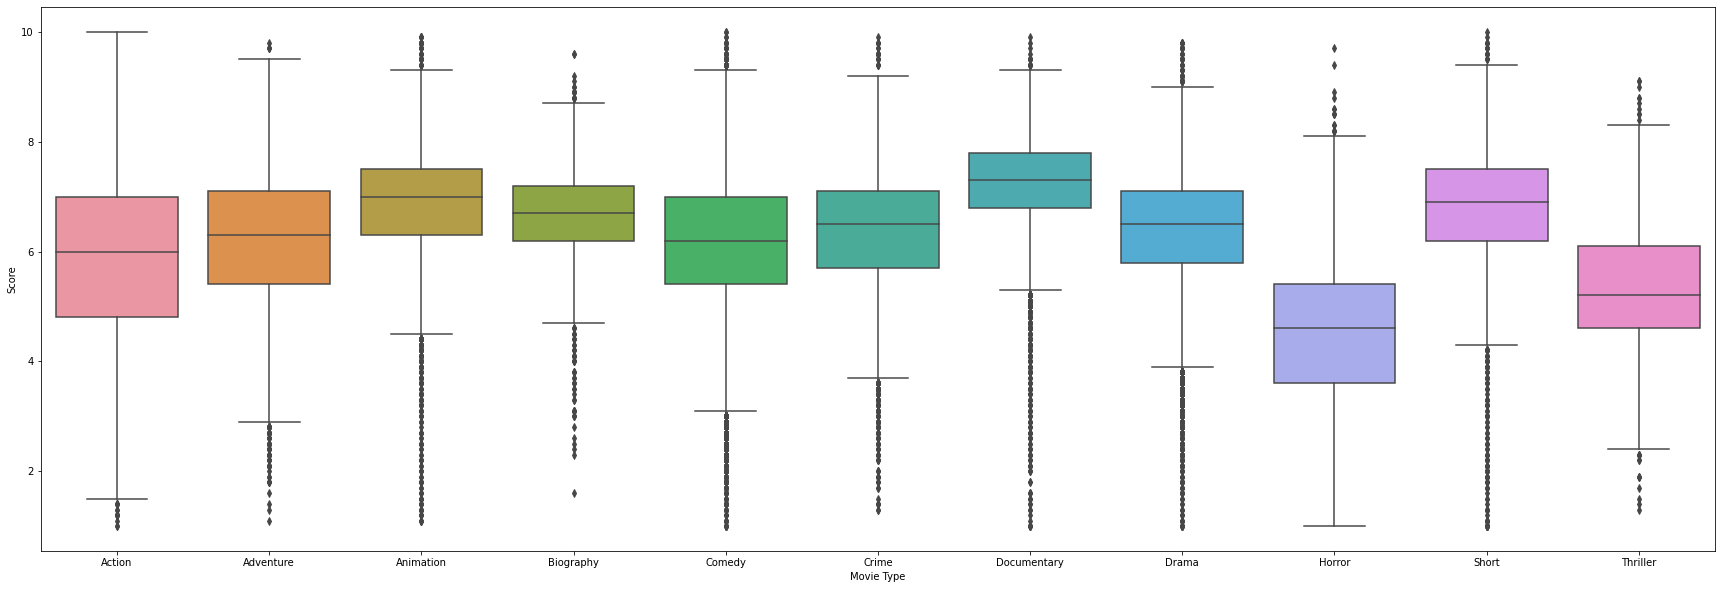

In [59]:
plt.figure(figsize=(30,10))
sns.boxplot(x='Movie Type' , y='Score', data=copy_pg)
pass

## 4. Подготовка данных. Нормализация, разбиение, образование класса

In [132]:
popular_genres = data_new.loc[data['Movie Type'].isin(['Action','Drama','Adventure','Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Thriller','Horror'])]
copy_pg_new=popular_genres.copy()
copy_pg_new['Movie Type'] = copy_pg_new['Movie Type'].astype('O')
copy_pg_new['Movie Type'] = copy_pg_new['Movie Type'].astype('category')
copy_pg_new = copy_pg_new.reset_index(drop=True)
copy_pg_new.shape

(4666, 14)

In [133]:
copy_pg_new = copy_pg_new.drop('Actors', axis = 1)
copy_pg_new = copy_pg_new.drop('Movie Name', axis = 1)
copy_pg_new = copy_pg_new.drop('Serie Date', axis = 1)
copy_pg_new = copy_pg_new.drop('Director', axis = 1)
copy_pg_new = copy_pg_new.drop('Restriction', axis = 1)
copy_pg_new = copy_pg_new.drop('Description', axis = 1)
copy_pg_new = copy_pg_new.drop('Serie Name', axis = 1)
copy_pg_new

,Movie Date,Movie Type,Number of Votes,Movie Revenue (M$),Score,Metascore,Time Duration (min)
0,1994,Drama,2294987,28341469.0,9.3,80.0,142.0
1,2008,Action,2259829,534858444.0,9.0,84.0,152.0
2,2010,Action,2021865,292576195.0,8.8,74.0,148.0
3,1999,Drama,1819635,37030102.0,8.8,66.0,139.0
4,1994,Crime,1792272,107928762.0,8.9,94.0,154.0
...,...,...,...,...,...,...,...
4661,2006,Documentary,155,311258.0,6.3,59.0,90.0
4662,2008,Comedy,154,2694.0,5.4,35.0,80.0
4663,2013,Documentary,154,9009.0,6.7,82.0,88.0
4664,2017,Documentary,154,32494.0,6.7,76.0,91.0


In [135]:
copy_pg_new['class']=''
for index, value in copy_pg_new['class'].items():
    if (copy_pg_new.at[index, 'Score'] >= 8.5 or copy_pg_new.at[index, 'Metascore'] >= 85):
        copy_pg_new.at[index, 'class'] = 'Greatest'
    elif((copy_pg_new.at[index, 'Score'] >= 7.0 and copy_pg_new.at[index, 'Score'] < 8.5)
         or (copy_pg_new.at[index, 'Metascore'] >= 70 and copy_pg_new.at[index, 'Metascore'] < 85)):
        copy_pg_new.at[index, 'class'] = 'Great'
    elif((copy_pg_new.at[index, 'Score'] >= 6.0 and copy_pg_new.at[index, 'Score'] < 7.0)
         or (copy_pg_new.at[index, 'Metascore'] >= 60 and copy_pg_new.at[index, 'Metascore'] < 70)):
        copy_pg_new.at[index, 'class'] = 'Good'
    elif((copy_pg_new.at[index, 'Score'] >= 4.5 and copy_pg_new.at[index, 'Score'] < 6.0)
         or (copy_pg_new.at[index, 'Metascore'] >= 45 and copy_pg_new.at[index, 'Metascore'] < 60)):
        copy_pg_new.at[index, 'class'] = 'Average'
    else:
        copy_pg_new.at[index, 'class'] = 'Awful'

In [136]:
y = copy_pg_new['class']
copy_pg_new = copy_pg_new.drop('class', axis = 1)
y

0       Greatest
1       Greatest
2       Greatest
3       Greatest
4       Greatest
          ...   
4661        Good
4662     Average
4663       Great
4664       Great
4665        Good
Name: class, Length: 4666, dtype: object

In [137]:
Building_dummies = pd.get_dummies(copy_pg_new['Movie Type'])
copy_pg_new = copy_pg_new.drop(['Movie Type'], axis=1)
copy_pg_new = copy_pg_new.drop(['Movie Date'], axis=1)
copy_pg_new = pd.concat((copy_pg_new, Building_dummies), axis=1)

In [138]:
work_data = (copy_pg_new - copy_pg_new.mean(axis = 0))/copy_pg_new.std(axis = 0)

In [139]:
work_data.describe()

,Number of Votes,Movie Revenue (M$),Score,Metascore,Time Duration (min),Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Horror,Thriller
count,4.666000e+03,4.666000e+03,4.666000e+03,4.666000e+03,4.666000e+03,4.666000e+03,4.666000e+03,4.666000e+03,4.666000e+03,4.666000e+03,4.666000e+03,4.666000e+03,4.666000e+03,4.666000e+03,4.666000e+03
mean,1.792394e-16,-1.580628e-16,-2.044604e-14,-3.869660e-16,1.649333e-16,1.201249e-14,4.911892e-16,-3.710075e-15,6.937930e-15,3.283510e-15,-4.290229e-15,4.660676e-15,-2.604004e-16,-3.583473e-15,1.705546e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.238913e-01,-1.767378e-01,-5.111789e+00,-3.433688e+00,-2.681757e+00,-2.667414e-01,-1.638378e-01,-1.456897e-01,-2.159808e-01,-5.843821e-01,-2.363959e-01,-5.341706e-01,-6.519792e-01,-9.977262e-02,-6.560378e-02
25%,-1.168569e-01,-1.757070e-01,-5.972336e-01,-6.325443e-01,-4.768466e-01,-2.667414e-01,-1.638378e-01,-1.456897e-01,-2.159808e-01,-5.843821e-01,-2.363959e-01,-5.341706e-01,-6.519792e-01,-9.977262e-02,-6.560378e-02
50%,-1.027085e-01,-1.714976e-01,6.343306e-02,1.422401e-01,-1.376297e-01,-2.667414e-01,-1.638378e-01,-1.456897e-01,-2.159808e-01,-5.843821e-01,-2.363959e-01,-5.341706e-01,-6.519792e-01,-9.977262e-02,-6.560378e-02
75%,-7.871991e-02,-1.347652e-01,7.240997e-01,7.382280e-01,2.863915e-01,-2.667414e-01,-1.638378e-01,-1.456897e-01,-2.159808e-01,1.710842e+00,-2.363959e-01,-5.341706e-01,1.533463e+00,-9.977262e-02,-6.560378e-02
max,1.729005e+01,2.642670e+01,3.256655e+00,2.466593e+00,2.996787e+01,3.748146e+00,6.102288e+00,6.862434e+00,4.629049e+00,1.710842e+00,4.229285e+00,1.871660e+00,1.533463e+00,1.002064e+01,1.523976e+01


## 5.Обучение
### Метод k-ближайших соседей

In [160]:
X=work_data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 16)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print((N_train, N_test))
print(N_train + N_test)

(3732, 934)
4666


In [217]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

err_train = []
err_test = []
ntests = 25

for i in range (1,ntests):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    y_train_predict = knn.predict(X_train)
    y_test_predict = knn.predict(X_test)
    err_train.append(np.mean(y_train != y_train_predict))
    err_test.append(np.mean(y_test  != y_test_predict))
    print("Матрица ошибок для",i , "соседей\n", confusion_matrix(y_test, y_test_predict))  
    print("Ошибка на обучающем датасете: {}".format(err_train[i-1]))
    print("Ошибка на тестовом датасете: {}".format(err_test[i-1]))

Матрица ошибок для 1 соседей
 [[189  17  81   2   0]
 [ 12  21   3   0   0]
 [ 95   1 303 111   0]
 [  3   0 102 382  29]
 [  0   0   1  22  26]]
Ошибка на обучающем датасете: 0.0
Ошибка на тестовом датасете: 0.34214285714285714
Матрица ошибок для 2 соседей
 [[241   7  40   1   0]
 [ 19  16   1   0   0]
 [139   1 330  40   0]
 [  5   0 142 360   9]
 [  0   0   1  32  16]]
Ошибка на обучающем датасете: 0.17085119412124924
Ошибка на тестовом датасете: 0.31214285714285717
Матрица ошибок для 3 соседей
 [[198  10  80   1   0]
 [ 15  20   1   0   0]
 [ 89   1 329  91   0]
 [  4   0 100 398  14]
 [  0   0   1  23  25]]
Ошибка на обучающем датасете: 0.16932026944274342
Ошибка на тестовом датасете: 0.30714285714285716
Матрица ошибок для 4 соседей
 [[224   7  57   1   0]
 [ 15  20   1   0   0]
 [113   1 348  48   0]
 [  2   0 112 395   7]
 [  0   0   2  28  19]]
Ошибка на обучающем датасете: 0.20545009185548072
Ошибка на тестовом датасете: 0.2814285714285714
Матрица ошибок для 5 соседей
 [[202  

### Результаты проведенных тестов. По оси x - число соседей K. По оси y - эмпирическая ошибка

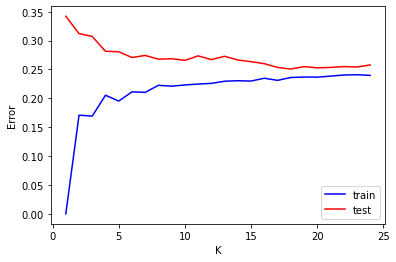

In [218]:
from numpy import arange
plt.plot(range(1,ntests,1),err_train,'b-', label = 'train')
plt.plot(range(1,ntests,1),err_test,'r-', label = 'test')
plt.legend(loc = 4)
plt.xlabel("K")
plt.ylabel("Error")
plt.show()

## Random Forest

In [225]:
err_train = []
err_test = []    

nstep=5

for i in range (1,ntests):
    rfc = RandomForestClassifier(n_estimators = i*nstep)
    rfc.fit(X_train, y_train)
    y_train_predict = rfc.predict(X_train)
    y_test_predict = rfc.predict(X_test)
    err_train.append(np.mean(y_train != y_train_predict))
    err_test.append(np.mean(y_test  != y_test_predict))

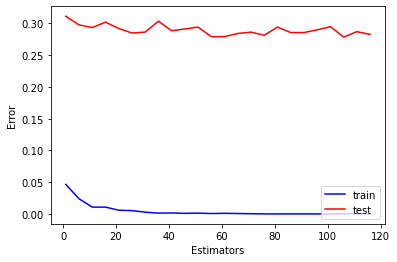

In [226]:
from numpy import arange
plt.plot(arange(1,(ntests-1)*nstep,5),err_train,'b-', label = 'train')
plt.plot(arange(1,(ntests-1)*nstep,5),err_test,'r-', label = 'test')
plt.legend(loc = 4)
plt.xlabel("Estimators")
plt.ylabel("Error")
plt.show()

### KNN показал результаты лучше. Будем использовать метод ближайших 19 соседей

## 6.Сокращение размерности
### Метод главных компонент (PCA)

In [227]:
from sklearn.decomposition import PCA

sc = sklearn.preprocessing.StandardScaler()
X_standart = sc.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standart)
X_pca = pd.DataFrame(X_pca, columns=['first component','second component'])

In [228]:
X.shape, X_pca.shape

((4666, 15), (4666, 2))

In [229]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.3, random_state = 5)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3266, 2), (3266,), (1400, 2), (1400,))

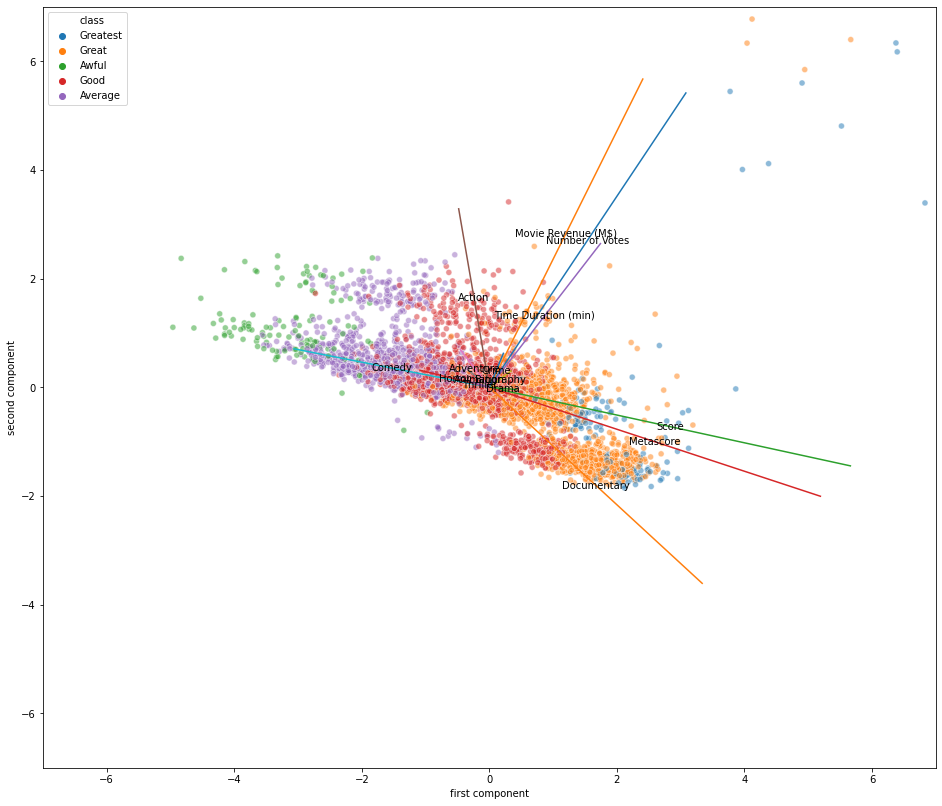

In [230]:
def biplot(XX, y, coeff, labels):
    plt.figure(figsize=(16,14))
    draw = pd.concat([XX, y], axis =1, join='inner')
    sns.scatterplot(data=draw, x='first component', y='second component', hue='class', alpha=0.5)
    for i in range(0, len(coeff[0])):
        plt.text(coeff[0, i]*5, coeff[1, i]*5, labels[i], color='black', ha='center', va='center')
        plt.plot([0, coeff[0, i]*10], [0, coeff[1, i]*10])
    plt.ylim((-7,7))
    plt.xlim((-7,7))
    
    
biplot(X_pca, y, pca.components_, X.columns)

### Перебор числа компонент

In [244]:
from sklearn.decomposition import PCA

sc = sklearn.preprocessing.StandardScaler()
X_standart = sc.fit_transform(X)


err_train = []
err_test = []
n_components = 10

for i in range(2,n_components):
    pca = PCA(n_components=i)
    X_pca = pca.fit_transform(X_standart)
    columns = []
    for j in range(0, i):
        columns.append(f"Component {j}")
    pr_com_Df = pd.DataFrame(data=X_pca, columns=columns)
    
    X_train, X_test, y_train, y_test = train_test_split(pr_com_Df, y, test_size = 0.3, random_state = 16)
    
    knn = KNeighborsClassifier(n_neighbors = 19)
    knn.fit(X_train, y_train)
    y_train_predict = knn.predict(X_train)
    y_test_predict = knn.predict(X_test)
    err_train.append(np.mean(y_train != y_train_predict))
    err_test.append(np.mean(y_test  != y_test_predict))
    print("Ошибка на обучающем датасете: {}".format(err_train[i-2]))
    print("Ошибка на тестовом датасете: {}".format(err_test[i-2]))

Ошибка на обучающем датасете: 0.23974280465401102
Ошибка на тестовом датасете: 0.25642857142857145
Ошибка на обучающем датасете: 0.16993263931414573
Ошибка на тестовом датасете: 0.19142857142857142
Ошибка на обучающем датасете: 0.1711573790569504
Ошибка на тестовом датасете: 0.18785714285714286
Ошибка на обучающем датасете: 0.17758726270667483
Ошибка на тестовом датасете: 0.19357142857142856
Ошибка на обучающем датасете: 0.17483159828536435
Ошибка на тестовом датасете: 0.19214285714285714
Ошибка на обучающем датасете: 0.17513778322106552
Ошибка на тестовом датасете: 0.19357142857142856
Ошибка на обучающем датасете: 0.17636252296387017
Ошибка на тестовом датасете: 0.19428571428571428
Ошибка на обучающем датасете: 0.17666870789957134
Ошибка на тестовом датасете: 0.19428571428571428


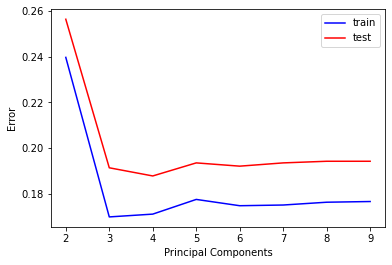

In [248]:
from numpy import arange
plt.plot(arange(2,n_components,1),err_train,'b-', label = 'train')
plt.plot(arange(2,n_components,1),err_test,'r-', label = 'test')
plt.legend(loc = 1)
plt.xlabel("Principal Components")
plt.ylabel("Error")
plt.show()

### LCA

In [183]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

sc = sklearn.preprocessing.StandardScaler()
X_standart = sc.fit_transform(X)

lda = LinearDiscriminantAnalysis(n_components = 2)
X_lda = lda.fit_transform(X_standart, y)
X_lda = pd.DataFrame(X_lda,columns = ['first component','second component'])

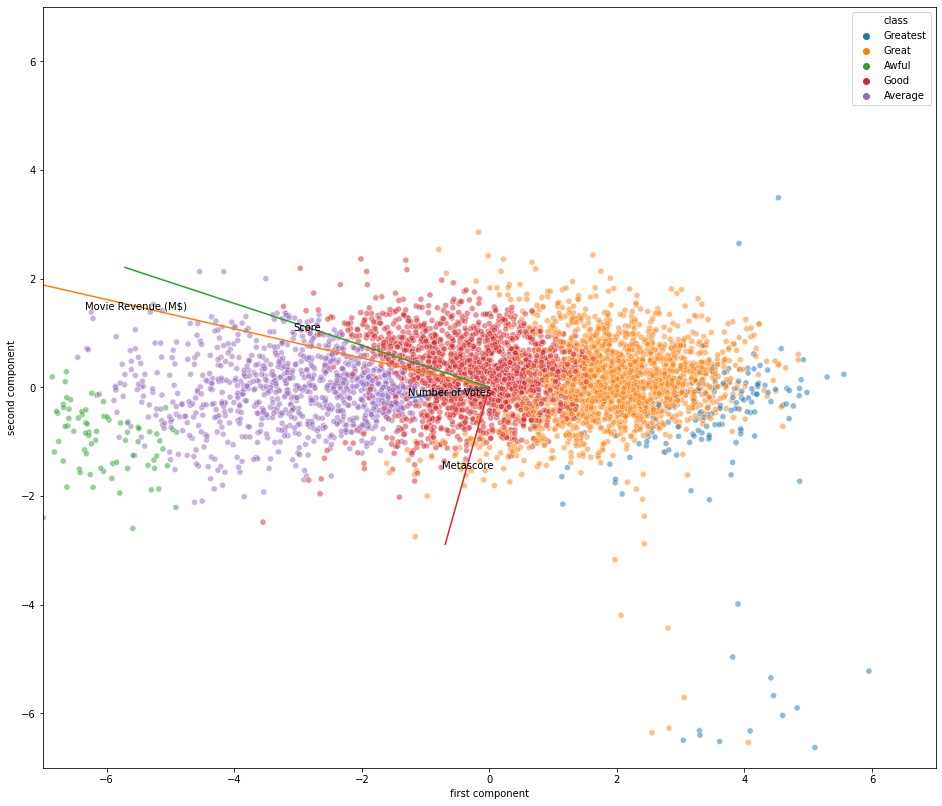

In [184]:
biplot(X_lda, y, lda.scalings_, X.columns)

### Перебор числа компонент

In [253]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

sc = sklearn.preprocessing.StandardScaler()
X_standart = sc.fit_transform(X)


err_train = []
err_test = []
n_components = 5

for i in range(2,n_components):
    lda = LinearDiscriminantAnalysis(n_components=i)
    X_lda = lda.fit_transform(X_standart,y)
    columns = []
    for j in range(0, i):
        columns.append(f"Component {j}")
    pr_com_Df = pd.DataFrame(data=X_lda, columns=columns)
    
    X_train, X_test, y_train, y_test = train_test_split(pr_com_Df, y, test_size = 0.3, random_state = 16)
    
    knn = KNeighborsClassifier(n_neighbors = 19)
    knn.fit(X_train, y_train)
    y_train_predict = knn.predict(X_train)
    y_test_predict = knn.predict(X_test)
    err_train.append(np.mean(y_train != y_train_predict))
    err_test.append(np.mean(y_test  != y_test_predict))
    print("Ошибка на обучающем датасете: {}".format(err_train[i-2]))
    print("Ошибка на тестовом датасете: {}".format(err_test[i-2]))

Ошибка на обучающем датасете: 0.09889773423147581
Ошибка на тестовом датасете: 0.11928571428571429
Ошибка на обучающем датасете: 0.06644213104715248
Ошибка на тестовом датасете: 0.08785714285714286
Ошибка на обучающем датасете: 0.06491120636864667
Ошибка на тестовом датасете: 0.07857142857142857


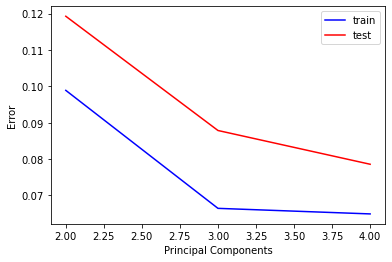

In [254]:
from numpy import arange
plt.plot(arange(2,n_components,1),err_train,'b-', label = 'train')
plt.plot(arange(2,n_components,1),err_test,'r-', label = 'test')
plt.legend(loc = 1)
plt.xlabel("Principal Components")
plt.ylabel("Error")
plt.show()

Вывод: Сокращение числа компонент пошло на пользу задаче. LCA с методом